In [1]:
# import data manipulation and visualisation libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# import nltk libraries for text mining
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
# import cleaned and labelled Osha accident cases dataset
df_osha = pd.read_csv('osha_clean_cause_labelled.csv')

In [3]:
df_osha.head()

,Unnamed: 0,incident_ID,title,description,length_title,length_description,title_processed,description_processed,length_title_processed,length_description_processed,cause
0,0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,47,1400,employee burned forklift radiator fluid,approximately a.m. november employee edco wast...,39,860,Caught in/between Objects
1,1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,52,304,employee fall flatbed trailer later dy,august employee working flatbed trailer worked...,38,191,Struck By Moving Objects
2,2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,59,777,two worker struck motor vehicle one killed,august employee templar inc. construction comp...,42,500,Struck By Moving Objects
3,3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,48,1552,employee struck bale wire killed,august employee lee iron metal company inc. us...,32,1040,Struck By Moving Objects
4,4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,51,1539,employee splashed hot water burned,july employee vacuum pump truck driver operato...,34,1007,Exposure to extreme temperatures


In [4]:
# drop the unused columns
df_osha = df_osha.drop(["Unnamed: 0", 'length_title', 'length_description', 'title_processed', 'description_processed', 'length_title_processed', 'length_description_processed'], axis = 1)

In [5]:
# inspect the dataset
df_osha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16323 entries, 0 to 16322
Data columns (total 4 columns):
incident_ID    16323 non-null int64
title          16323 non-null object
description    16323 non-null object
cause          16323 non-null object
dtypes: int64(1), object(3)
memory usage: 510.2+ KB


In [6]:
# Combine the string in "title" and "description" adn stored in a new column
df_osha['title_description'] = df_osha['title'] + " " + df_osha['description']

In [7]:
# define a function for text mining with the following steps:
# 1. remove the non English words
# 2. tokenize the string for each row
# 3. remove punctiation
# 4. convert each of the token to lower case
# 5. remove stopwords
# 6. lemmatize each of the token
# 7. join the tokens back into string

mystopwords = stopwords.words("English")
wnlemma = nltk.WordNetLemmatizer()
def pre_process(text):
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    tokens_nop = [word for word in tokens if word not in string.punctuation]
    tokens_lower = [ word.lower() for word in tokens_nop ]
    tokens_nostop = [word for word in tokens_lower if word not in mystopwords]
    tokens_lemma = [wnlemma.lemmatize(word) for word in tokens_nostop]
    text_after_process = " ".join(tokens_lemma)
    return(text_after_process)

In [8]:
# apply the "pre_process" function on each row of "title" column for labelled Osha accident cases dataset
df_osha['title_description_processed'] = df_osha['title_description'].apply(pre_process)

In [9]:
# define a dictionary with fatality keywords
fatal_keywords = ['kill', 'kills', 'killed', 'killing', \
                  'murder', 'murders', 'murdered', 'murdering', \
                  'die', 'dies', 'died', 'dying', 'dead', 'death', 'deadly', \
                  'fatal', 'fatally', 'fatality', 'lethal' \
                  'decease', 'deceases', 'deceased', 'deceasing' \
                  'lifeless', 'breathless', 'catastrophic', 'catastrophal', 'pass away', 'passed away']

In [10]:
# extract the row of the datatset which contains any keyword in fatal keywords
df_osha_fatal = df_osha[df_osha['title_description_processed'].str.contains('|'.join(fatal_keywords))]
df_osha_fatal.reset_index(drop=True, inplace=True)
df_osha_fatal.head()

,incident_ID,title,description,cause,title_description,title_description_processed
0,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,Struck By Moving Objects,Employee Falls From Flatbed Trailer And Later...,employee fall flatbed trailer later dy august ...
1,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,Struck By Moving Objects,Two Workers Are Struck By Motor Vehicle And O...,two worker struck motor vehicle one killed aug...
2,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,Struck By Moving Objects,Employee Is Struck By Bales Of Wire And Kille...,employee struck bale wire killed august employ...
3,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 E...,Caught in/between Objects,Foreman Is Fatally Crushed When Forklift Tips...,foreman fatally crushed forklift tip approxima...
4,201562840,Employee'S Body Is Caught In Asphalt Machine ...,On November 27 2012 Employee #1 was operati...,Caught in/between Objects,Employee'S Body Is Caught In Asphalt Machine ...,employee 's body caught asphalt machine dy nov...


In [11]:
# calculate the number of main cause that cause fatality
df_osha_fatal['cause'].value_counts()

Struck By Moving Objects            3624
Caught in/between Objects           1122
Falls                                878
Fires and Explosion                  332
Electrocution                        207
Other                                186
Exposure to extreme temperatures      96
Exposure to Chemical Substances       68
Collapse of object                    31
Drowning                              18
Suffocation                            6
Name: cause, dtype: int64

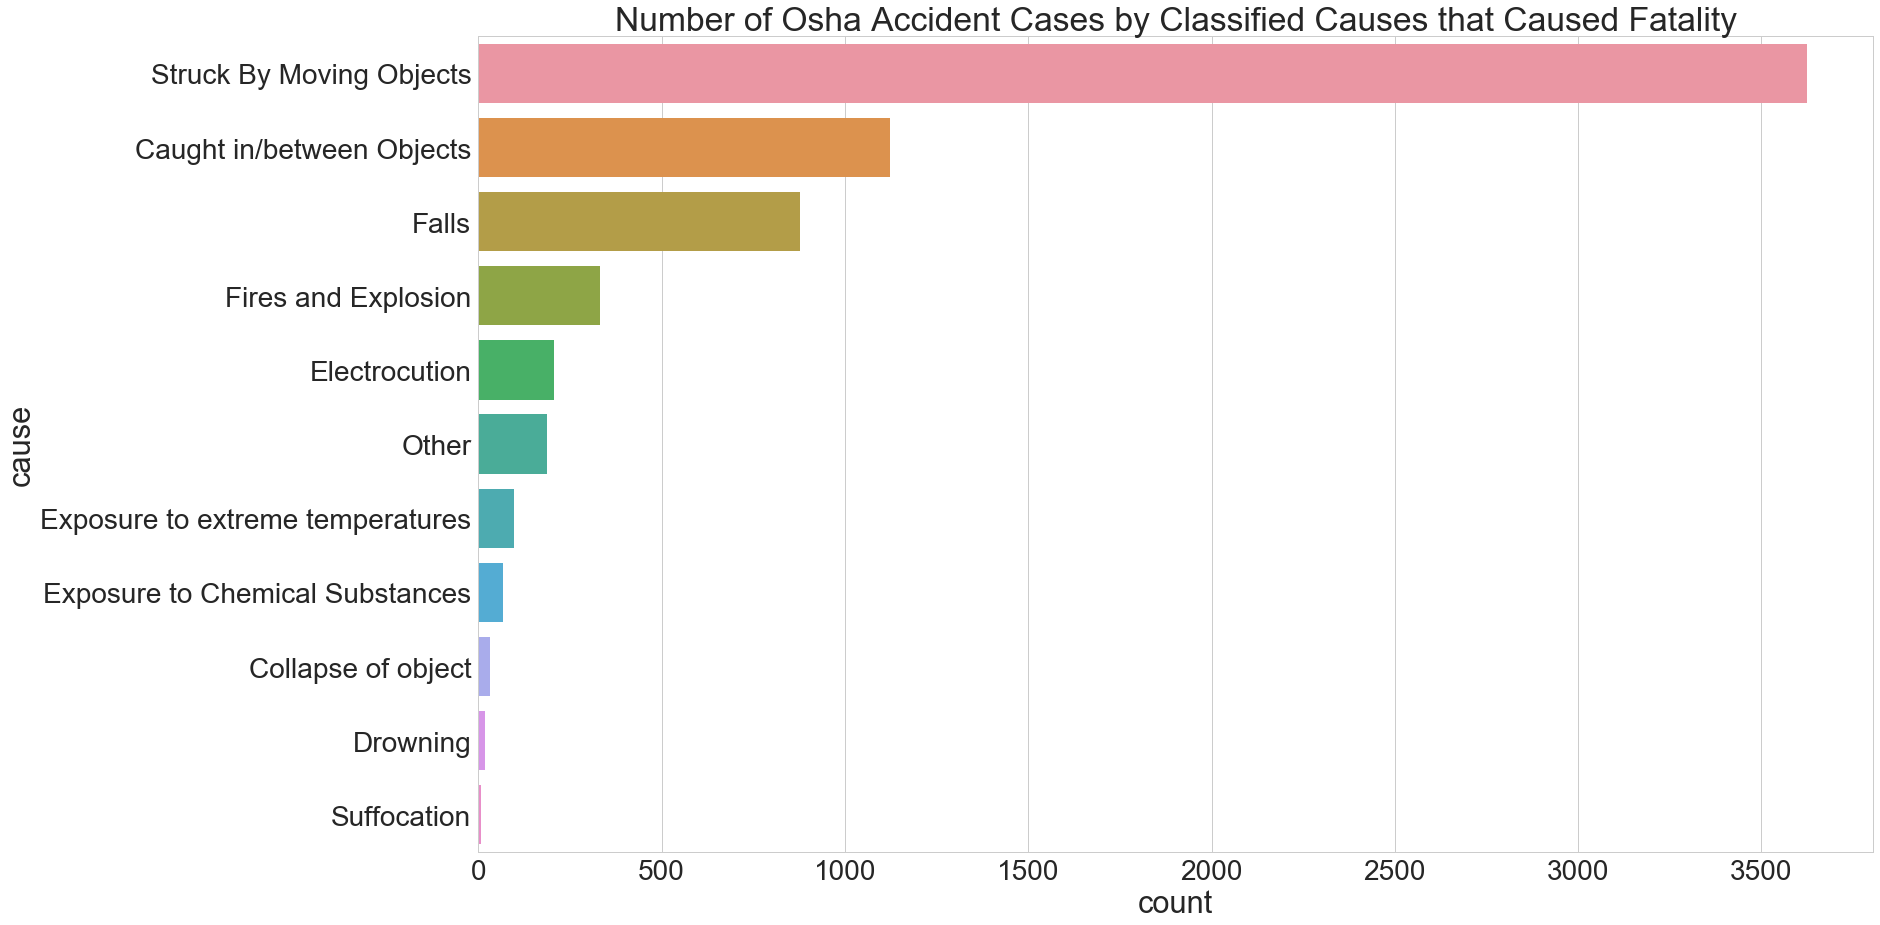

In [12]:
# plot the barchart of total number of Osha accident cases by cause that caused fatality
plt.figure(figsize=(25,15))
sns.set(style="whitegrid", font_scale=2.8)
ax = sns.countplot(y="cause", data=df_osha_fatal, order=df_osha_fatal['cause'].value_counts().index)
ax.set_title('Number of Osha Accident Cases by Classified Causes that Caused Fatality')
plt.show()

In [13]:
df_osha_fatal.to_csv('osha_fatal_clean_cause_labelled.csv')